In [2]:
library(forecast)
library(urca)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 4.0009 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


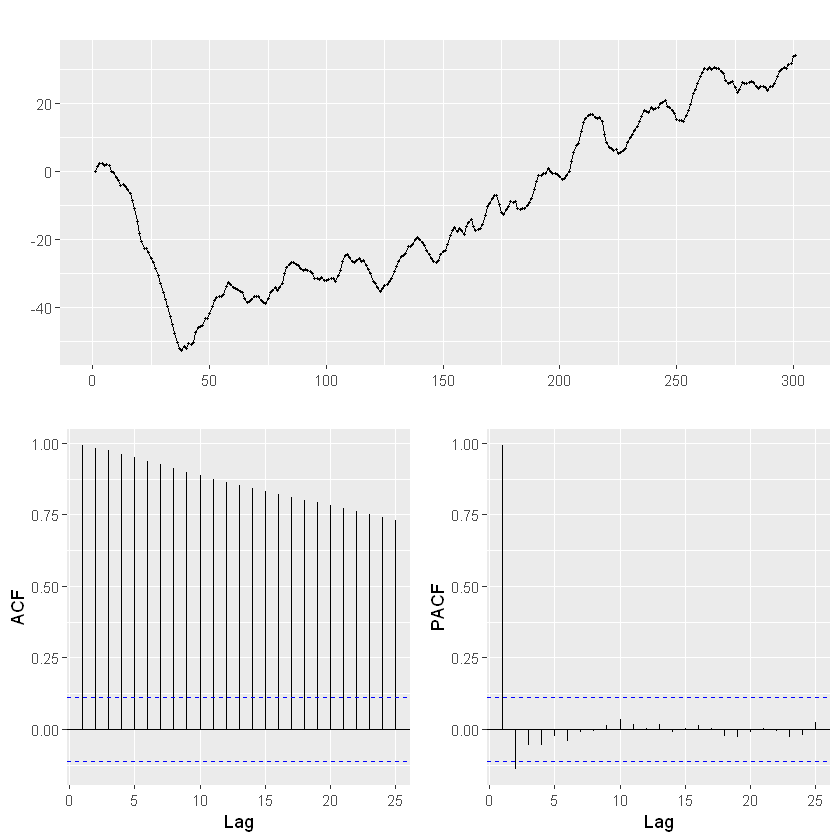

In [4]:
set.seed(1234)
# arima.sim로 ARIMA(1,1,1) 모델에 맞는 가상 데이터 생성
arima1_1_1<-arima.sim(model=list(order=c(1,1,1), ar=0.7, ma=-0.2), n=300)

# 생성한 raw data 정상성파악 - ACF, PACF 함수 사용
ggtsdisplay(arima1_1_1) 
# Corrlogram에서 첫번째에 해당하는 case

# 생성한 raw data 정상성파악 - KPSS검정 사용
summary(ur.kpss(arima1_1_1))
# 검정통계량값이 4.0009로 유의수준의 임계치보다 큰 값
# KPSS의 귀무가설(해당 데이터는 정상시계열이다)을 기각! => 해당 데이터는 비정상성이다라고 결론지어짐


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.5741 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


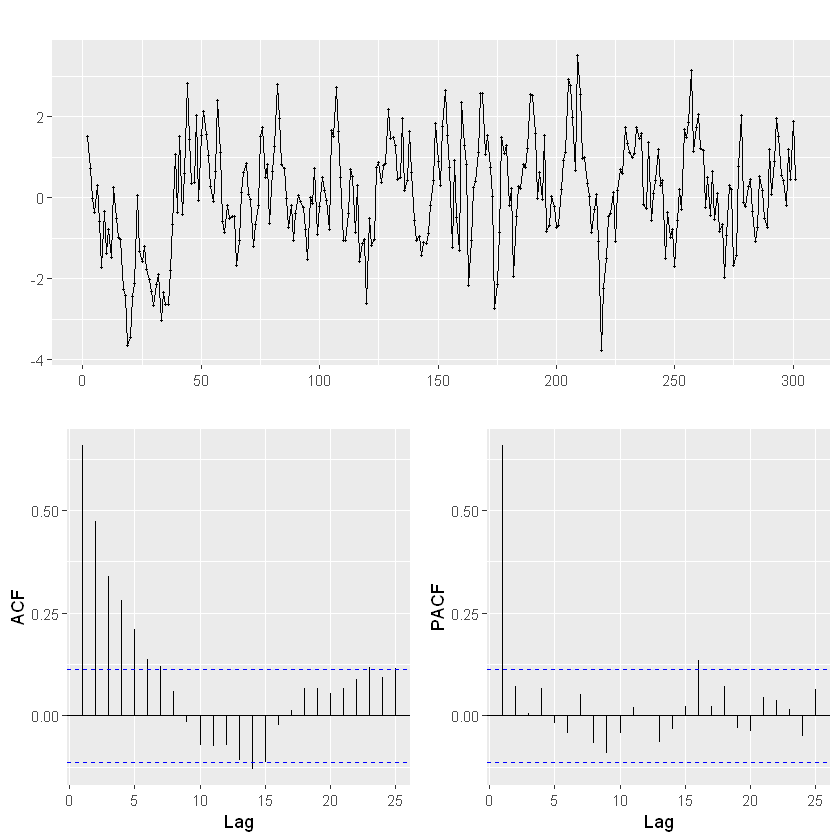

In [5]:
# raw data를 1번 차분한 후 데이터의 정상성 파악해보기
d_arima1_1_1<-diff(arima1_1_1)
ggtsdisplay(d_arima1_1_1)
summary(ur.kpss(d_arima1_1_1))

# 검정통계량값이 0.5741로 유의수준 1%의 임계치와 비교!! => 99%신뢰수준 임계치 0.739보다 작으므로 귀무가설 채택=> 해당 데이터는 정상성이다!
# ACF, PACF함수를 살펴보니 AR(1)정도는 해야할 것 같다.. 그리고 MA 안하거나 1정도 해보기


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 6.7601, df = 8, p-value = 0.5627

Model df: 2.   Total lags used: 10



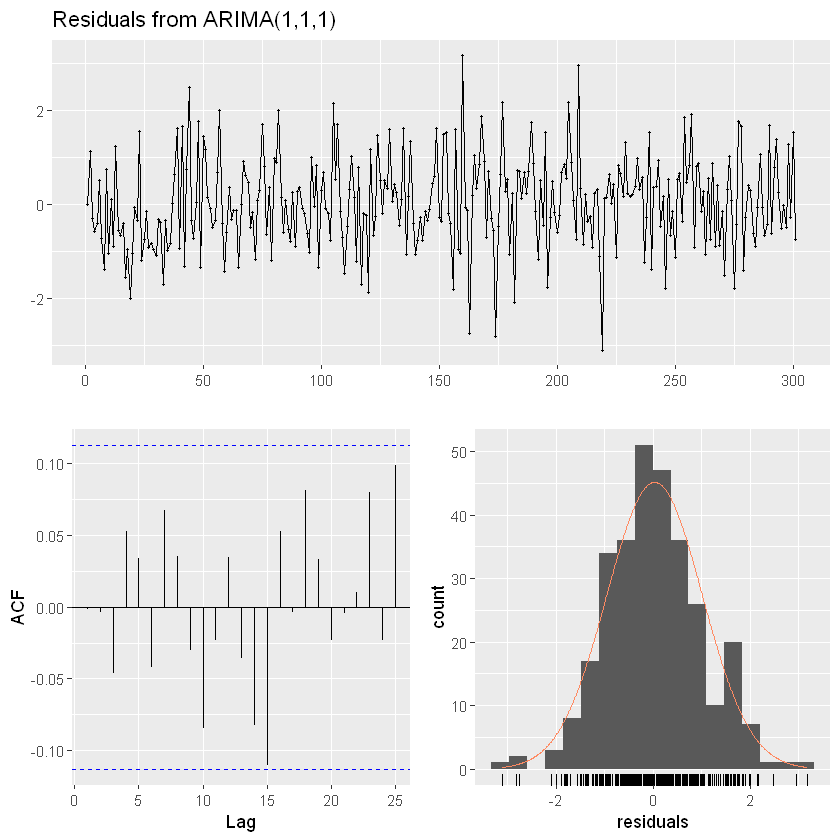


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 8.1592, df = 9, p-value = 0.5182

Model df: 1.   Total lags used: 10



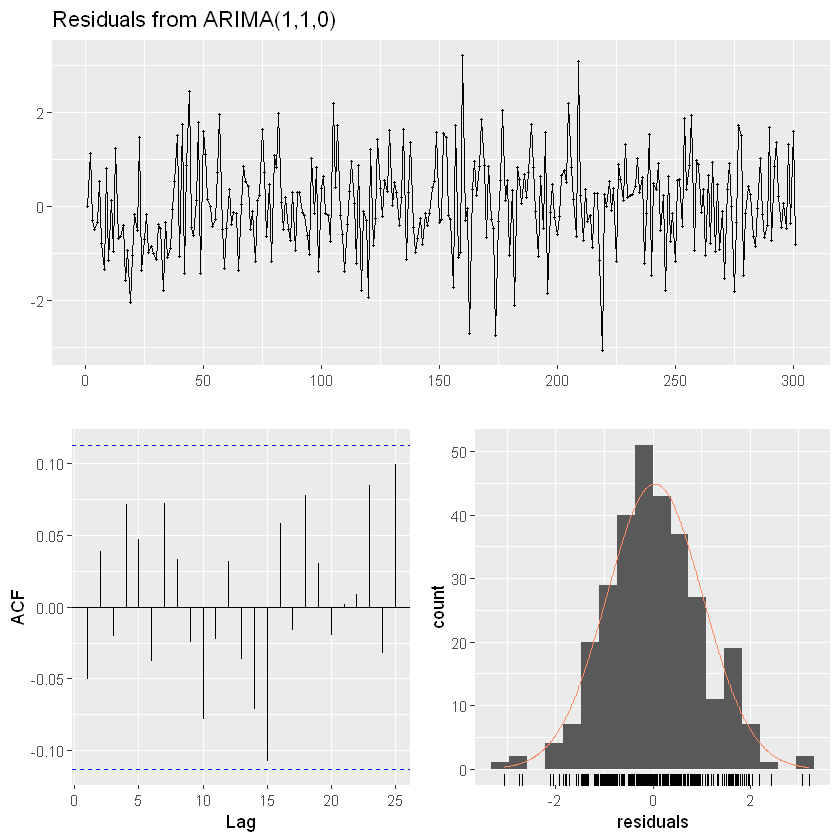


	Ljung-Box test

data:  Residuals from ARIMA(1,2,1)
Q* = 7.8, df = 8, p-value = 0.4532

Model df: 2.   Total lags used: 10



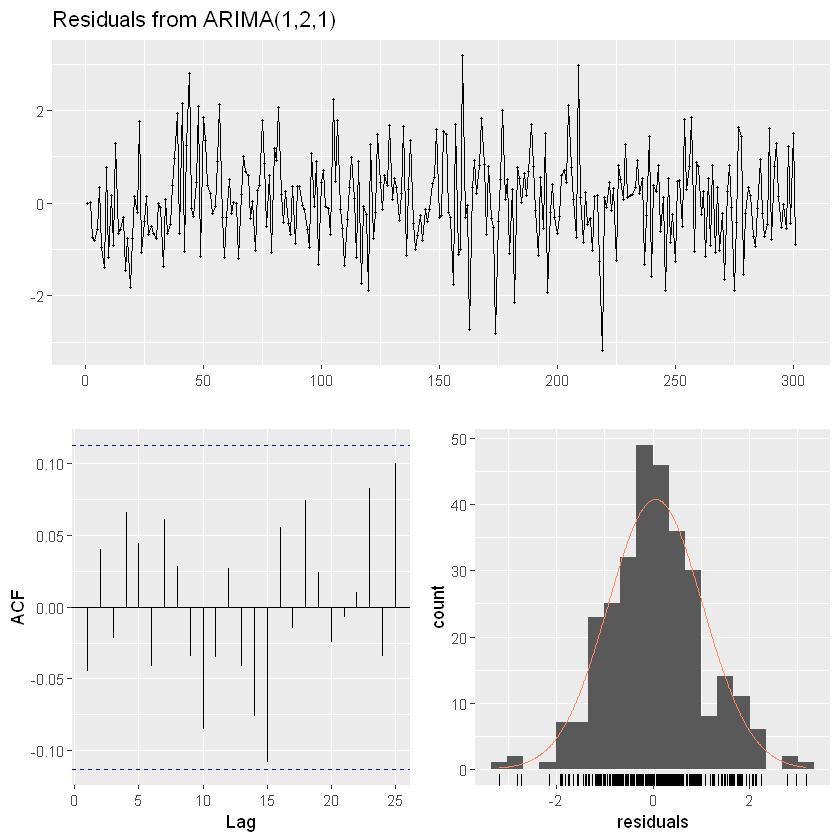

In [9]:
# 모형 fit시킬때 차분할거면 차분하기 전 원본 데이터를 넣어야해! (차분한 데이터 넣으면 이중차분됨)
# ARIMA(1,1,1) 모델
arima_fit1<-Arima(arima1_1_1,order=c(1,1,1))

# ARIMA(1,1,0) 모델
arima_fit2<-Arima(arima1_1_1,order=c(1,1,0))

# auto.arima 모델
arima_fit3<-auto.arima(arima1_1_1)

# 각 모델의 잔차 그래프 그려서 적합성보기
checkresiduals(arima_fit1)
checkresiduals(arima_fit2)
checkresiduals(arima_fit3)

# auto.arima은 특이하게 차분을 2번 해줌..
# 둘다 유의확률(p-value)값이 유의수준보다 크!므로 귀무가설을 채택= 잔차들의 자기상관성이 없음!
# 그런데 둘 중에 잔차그래프만 보고 어떤 모형이 더 적합한지는 잘 아직 모른다 => 예측값과 비교를 통해 RMSE값으로 선택하기

In [10]:
# RMSE값을 비교해서 더 적합한 모형 선접
summary(arima_fit1)
summary(arima_fit2)
summary(arima_fit3)

# ARIMA(1,1,1)모형이 가장 RMSE값이 낮으므로 적합
3 # 원래는 train,test 데이터 나누어서 test와의 비교를통한 RMSE값 비교가 가장 객관적!

Series: arima1_1_1 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.7248  -0.1124
s.e.  0.0604   0.0884

sigma^2 estimated as 0.9781:  log likelihood=-421.64
AIC=849.29   AICc=849.37   BIC=860.4

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.03516913 0.9840252 0.7739969 45.50617 63.99394 0.7348889
                     ACF1
Training set -0.001669357
Series: arima1_1_1 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.6621
s.e.  0.0431

sigma^2 estimated as 0.9801:  log likelihood=-422.45
AIC=848.9   AICc=848.94   BIC=856.3

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.03806468 0.9866853 0.7758803 47.62324 65.47506 0.7366771
                   ACF1
Training set -0.0504315
Series: arima1_1_1 
ARIMA(1,2,1) 

Coefficients:
         ar1      ma1
      0.6482  -0.9865
s.e.  0.0478   0.0126

sigma^2 estimated as 0.9888:  log likelihood=-422.63

# ARIMA D.I.Y

In [12]:
setwd("C:/Users/joyh1/Desktop/빅데이터_20-1/R_data")
data<-read.csv("data_ARIMA_DIY.csv")

In [17]:
# split data
data_1<-data[,1]
data_2<-data[,2]
data_3<-data[,3]
data_4<-data[,4]

In [20]:
# Time-series monthly 데이터로 변환(2001년 1월~2006년 12월)
ts_1<-ts(data_1, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_2<-ts(data_2, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_3<-ts(data_3, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_4<-ts(data_4, start=c(2001,1), end=c(2006,12), frequency = 12)